### __BUSA3020 Group Assignment - Predicting Used Car Sale Prices__

--- 

**Kaggle Competition Ends:** Friday, 31 May 2024 @ 3:00pm (Week 13)  
**Assignment Due Date on iLearn:** Friday, 31 May 2024 @ 11.59pm (Week 13)  

**Overview:**   

- In the group assignment you will form a team of 3 students and participate in a forecasting competition on Kaggle
- The goal is to predict prices of used cars based on car characteristics and regression models

**Instructions:** 

- Form a team of 3 students 
- Each team member needs to join [https://www.kaggle.com](https://www.kaggle.com/)  
- Choose a team leader and form a team on Kaggle [https://www.kaggle.com/t/ff5fb5beaeb14f7686df98fef9d1c0bc](https://www.kaggle.com/t/ff5fb5beaeb14f7686df98fef9d1c0bc)
    - Team leader to click on `team` and join and invite other 2 team members to join
    - Your **team's name must start** with our unit code, for instance you could have a team called BUSA3020_algorithm_arena
- All team members should work on all the tasks however   
    - Each team member will be responsible for one of the 3 tasks listed below    
- **Your predictions must be generated by a model you develop here** 
    - You will receive a mark of **zero** if your code is not able produce the forecasts you submit to Kaggle 

**Competition Rankings**

The rankings for the competition are determined through two different leaderboards:

- **Public Leaderboard Ranking**: Available during the competition, these rankings are calculated based on 50% of the test dataset, which includes 1,500 observations. This allows participants to see how they are performing while the competition is still ongoing.
- **Final Leaderboard Ranking**: These rankings are recalculated from the other 50% of the test dataset, which consists of the remaining 1,500 observations, and are revealed 5 minutes after the competition concludes. This final evaluation determines the ultimate standings of the competition.



**Marks**: 

- Total Marks: 40
- Your individual mark will consist of:  
    - 50% x overall assignment mark + 45% x mark for the task that you are responsible for + 5% x mark received from your teammates for your effort in group work 
- 1 mark: Ranking in the top 5 positions on the **final** leaderboard for your unit 
- 3 marks: Reaching the 1st place in your unit according to the **final** leaderboard ranking


**Submissions:**  

1. On Kaggle: submit your team's forecast in order to be ranked by Kaggle
    - Limit of 20 submission per day
2. On iLearn **only team leader to submit** the assignment Jupyter notebook re-named to your team's name on Kaggle   
    - The Jupyter notebook must contain team members names/ID numbers, and the group name Kaggle
    - One 15 minute video recording of your work 
        - 5 marks will be deducted from each Task for which there is no video presentation or if you don't follow the above instructions
3. On iLearn each student needs to submit a file with their teammates' names, ID number and a mark for their group effort (out of 100%)
    - You don't need to score yourself

---
---

**Fill out the following information**

- Team Name on Kaggle: `(insert here)`
- Team Leader and Team Member 1: `(insert here)`
- Team Member 2: `(insert here)`
- Team Member 3: `(insert here)`

---

## Task 1: Problem Description and Initial Data Analysis

1. Based on the Competition Overview, datasets and additional information provided on Kaggle, along with insights gained from personal research of the topic, write **Problem Description** (about 500 words) focusing on the sections listed below: 
- Forecasting Problem - explain what we are trying to do and how it could be used in the real world, e.g. who and how may benefit from it (3 marks)    
- Evaluation Criteria - discuss the criteria that  is used to assess forecasting performance in detail (3 marks)     
- Categorise the variables provided in the dataset according to their type; Hint: similar to what we had in Programming Task 1 (2 marks)  
- Missing Values - only explain what you find for both the training and test datasets at this stage (2 marks)
- Provide and discuss some interesting *univariate* summary statistics and distributions in the training dataset  (2 marks)       
- Other Hints:
    - You should **not** discuss any specific predictive algorithms at this stage
    - Minimise the number of cells you use to enhance presentation and readability

**Total Marks: 12**   

Student in charge of this task: `(Caterina Stirton)`

Forecasting Problem - By creating a forecasting model, the automotive finance team can predict prices of used cars to allow potential buyers to gain an informative insight into the consumer market of vehicles. 
Regression models can be created by investigating certain vehicle characteristics such as brand, year, model and petrol type to accurately predict the future prices of specific used cars. 

There are a range of certain consumers that can benefit from the use of forecasting models to predict used car prices such as:

Young people who have just obtained their license looking for the first car 
People who are worried about their depreciating car value in the future
Sellers who are trying to understand the market value of their vehicle
Insurance companies can understand potential prices of premiums based on vehicle quality
Banks and lenders can utilise price information to determine suitability for personal/car loans


Evaluation Criteria - In this investigation we evaluated test and training datasets. Using the MAPE (Mean Absolute Percentage Error) we can determine the reliability and the accuracy of the forecasting model in decimal form. To measure model performance, we have used cross validation and RFE to select the optimal number of features to enhance the model performance (MAPE). The most optimal result is between 0.1 and 0.2 which measures the most accurate model predicton. The lowest MAPE out of 5 machine learning algorithms was gradient boosting for which the score was 0.12. If the MAPE is above 0.5, it is not viable for predicting the target variable (which is price in this instance). 


| Variable Kind | Number of Features | Feature Names                          	|
|---------------|--------------------|--------------------------------------------|
| Numeric   	| 23             	| back_legroom,  city_fuel_economy, daysonmarket, engine_displacement, font_legroom, fuel_tank_volume, height,    highway_fuel_economy, Horsepower, latitude, length, listed_date, longitude, maximum_seating, mileage, power, savings_amount, seller_rating, torque, wheelbase, width, year, price (target)|
| Categorical  	| 16              	|  vin, body_type, city, dealer_zip, engine_type,  exterior_color, Franchise_dealer, fuel_type, interior_color, is_new,listing_color, make_name, model_name, transmission, transmission_display, wheel_system


In [12]:
# Table data
data = {
    "Feature": ["back_legroom", "exterior_color", "franchise_dealer", "front_legroom", "fuel_tank_volume", "height",
                "interior_color", "latitude", "length", "maximum_seating", "mileage", "power", "savings_amount",
                "seller_rating", "transmission", "transmission_display", "wheel_system", "wheelbase", "width"],
    "Training": [3, 110, 84, 3, 3, 3, 805, 134, 3, 3, 282, 8, 108, 100, 75, 75, 2, 3, 3],
    "Test": [25, 45, 39, 25, 25, 25, 379, 41, 25, 25, 149, 325, 42, 29, 59, 59, 9, 25, 25]
}

# Create markdown table
markdown_table = "| Feature              | Training | Test |\n"
markdown_table += "|----------------------|----------|------|\n"
for feature, training, test in zip(data["Feature"], data["Training"], data["Test"]):
    markdown_table += f"| {feature:<20} | {training:<8} | {test:<4} |\n"

# Display the markdown table
print(markdown_table)


| Feature              | Training | Test |
|----------------------|----------|------|
| back_legroom         | 3        | 25   |
| exterior_color       | 110      | 45   |
| franchise_dealer     | 84       | 39   |
| front_legroom        | 3        | 25   |
| fuel_tank_volume     | 3        | 25   |
| height               | 3        | 25   |
| interior_color       | 805      | 379  |
| latitude             | 134      | 41   |
| length               | 3        | 25   |
| maximum_seating      | 3        | 25   |
| mileage              | 282      | 149  |
| power                | 8        | 325  |
| savings_amount       | 108      | 42   |
| seller_rating        | 100      | 29   |
| transmission         | 75       | 59   |
| transmission_display | 75       | 59   |
| wheel_system         | 2        | 9    |
| wheelbase            | 3        | 25   |
| width                | 3        | 25   |



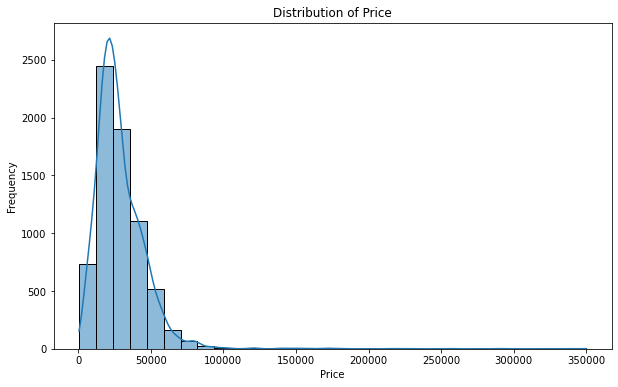

In [4]:
# Visualize the distribution of the 'price'
plt.figure(figsize=(10, 6))
sns.histplot(df_summary['price'].dropna(), kde=True, bins=30)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

## Only for the training dataset 
- Mean and Median:
Mean: The average price of vehicles is 28851.277693
Median: The middle value of the price distribution is 25387.000000 . Given the skewness, the median might be lower than the mean.

- Skewness:
The distribution is right-skewed (positively skewed), indicating a long tail on the right side. This suggests that while most vehicle prices are clustered around the lower end, there are some vehicles with significantly higher prices.
- Kurtosis:
The distribution has a high peak, suggesting the presence of outliers (very expensive vehicles).


In [12]:
df_summary['price'].describe()

count      7000.000000
mean      28851.277693
std       17582.731720
min         650.000000
25%       17986.500000
50%       25387.000000
75%       36992.000000
max      350000.000000
Name: price, dtype: float64

`(Task 1, Text Here - insert more cells as required)`

In [7]:
# importing all required libraries 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn import linear_model


from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression


from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_percentage_error, make_scorer

#
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.svm import SVR

import warnings
warnings.filterwarnings('ignore')

C:\Users\adity\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Reading/loading the combined dataset here 
df = pd.read_csv('data/train.csv')
df_summary=  pd.read_csv('data/train_only.csv')

---

## Task 2: Data Cleaning, Missing Observations and Feature Engineering
- In this task you need to follow a set of instructions/questions listed below.
- Make sure you explain each answer carefully both in Markdown text, as well as on your video.

**Total Marks: 12**

Student in charge of this task: Aditya Agarwal and Han Chang Li

**Task 2, Question 1**: Clean **all** numerical features so that they can be used in training algorithms. For instance, back_legroom feature is in object format containing both numerical values and text. Extract numerical values (equivalently eliminate the text) so that the numerical values can be used as a regular feature.  
(2 marks)

In [3]:
## Task 2, Question 1 Code Here

# Function to extract numerical values from strings and convert to float
def extract_numerical_value(series):
    return pd.to_numeric(series.astype(str).str.extract(r'(\d+\.?\d*)')[0], errors='coerce')

# List of columns to convert
columns_to_convert = [
    'back_legroom', 'front_legroom', 'fuel_tank_volume', 'height', 'highway_fuel_economy', 'horsepower', 'latitude', 'mileage', 'savings_amount', 
    'seller_rating','year','length', 'maximum_seating', 'wheelbase', 'width', 
    'city_fuel_economy','daysonmarket','dealer_zip','engine_displacement', 
]


# Clean `power` and `torque` features
#  Remove "hp", "@", "RPM" and commas in `power`
def clean_power(value):
    cleaned_value = value.replace(' hp', '').replace(' @ ', ' ').replace(' RPM', '').replace(',', '')
    return cleaned_value

#  Remove "lb-ft", "@", "RPM" and commas in `torque`
def clean_torque(value):
    cleaned_value = value.replace(' lb-ft', '').replace(' @ ', ' ').replace(' RPM', '').replace(',', '')
    return cleaned_value

# Apply the function to the `power` and `torque` features
df['power'] = df['power'].astype(str).apply(clean_power)
df['torque'] = df['torque'].astype(str).apply(clean_torque)


# Apply the extraction function to each column
for column in columns_to_convert:
    df[column] = extract_numerical_value(df[column])

# Handle missing values (example: fill with median)
for column in columns_to_convert:
    df[column].fillna(df[column].median(), inplace=True)

# Display the cleaned DataFrame
df.head()

,vin,back_legroom,body_type,city,city_fuel_economy,daysonmarket,dealer_zip,engine_displacement,engine_type,exterior_color,...,savings_amount,seller_rating,torque,transmission,transmission_display,wheel_system,wheelbase,width,year,price
0,2HGFC2F60LH543004,37.4,Sedan,Indio,30.0,189,92203,2000.0,I4,Cosmic Blue Metallic,...,0.0,4.666667,138 4200,CVT,Continuously Variable Transmission,FWD,106.3,70.8,2020,21605.0
1,3VW2B7AJ7HM347446,38.1,Sedan,Houston,28.0,12,77074,1400.0,I4,NaN,...,148.0,4.250000,184 1600,A,Automatic,FWD,104.4,70.0,2017,11991.0
2,WBAJA5C36HG897684,36.5,Sedan,Vista,24.0,10,92081,2000.0,I4,Dark Graphite Metallic,...,617.0,4.416667,258 1500,A,Automatic,RWD,117.1,83.7,2017,31974.0
3,2GKFLWEK3F6333294,39.9,SUV / Crossover,Ft Myers,20.0,2,33905,2400.0,I4,Onyx Black,...,1170.0,4.357143,272 4800,A,Automatic,AWD,112.5,72.8,2015,14550.0
4,5N1AT2MV0LC786510,37.9,SUV / Crossover,Avon,25.0,195,46123,2500.0,I4,Magnetic Black Pearl,...,0.0,3.734940,175 4400,CVT,Continuously Variable Transmission,AWD,106.5,72.4,2020,23500.0


`(Task 2, Question 1 Text Here - insert more cells as required)`

**Task 2, Question 2** Create at least 5 new features from the existing numerical variables which contain multiple items of information, for example you could extract maximum torque and torque rpm from the torque variable.  
(2 marks)

In [4]:
#Task 2 Question 2
# Create new features

# 1. Engine Efficiency
df['engine_efficiency'] = df['horsepower'] / df['engine_displacement']

# 2. Fuel Efficiency
df['combined_fuel_efficiency'] = (df['city_fuel_economy'] + df['highway_fuel_economy']) / 2

# 3. Size to Fuel Efficiency Ratio
df['size'] = df['length'] * df['width'] * df['height']
df['size_to_fuel_efficiency_ratio'] = df['size'] / df['combined_fuel_efficiency']

# 4. Vehicle Age
current_year = 2024
df['vehicle_age'] = current_year - df['year']

# 5. Power
# Split the `power` column into two columns based on the '@' delimiter
df[['max_power', 'power_rpm']] = df['power'].str.split(' ', expand=True)
df['max_power'] = df['max_power'].astype(str).str.replace('nan', '', regex=False)
df['power_rpm'] = df['power_rpm'].astype(str).str.replace('nan', '', regex=False)

# Convert to numeric after removing 'nan'
df['max_power'] = pd.to_numeric(df['max_power'], errors='coerce')  # Coerce errors to NaN
df['power_rpm'] = pd.to_numeric(df['power_rpm'], errors='coerce')

# 6. Torque
df[['max_torque', 'torque_rpm']] = df['torque'].str.split(' ', expand=True)
df['max_torque'] = df['max_torque'].astype(str).str.replace('nan', '', regex=False)
df['torque_rpm'] = df['torque_rpm'].astype(str).str.replace('nan', '', regex=False)

# Convert to numeric after removing 'nan'
df['max_torque'] = pd.to_numeric(df['max_torque'], errors='coerce')  # Coerce errors to NaN
df['torque_rpm'] = pd.to_numeric(df['torque_rpm'], errors='coerce')

# 7. Identify luxury brands
luxury_brands = ['BMW', 'Mercedes-Benz', 'Audi', 'Lexus', 
                 'Land Rover', 'Porsche', 'Bentley', 'Ferrari', 
                 'Rolls-Royce', 'McLaren', 'Aston Martin', 'Cadillac', 'Lincoln', 
                 'Maserati', 'Jaguar', 'Lamborghini']
df['is_luxury'] = df['make_name'].isin(luxury_brands)

# 8. Interior Space Efficiency
df['interior_space_eff'] = (df['front_legroom'] + df['back_legroom']) / df['length']

# 9. Country built from VIN
df['country_built'] = df['vin'].astype(str).str[0]
country_mapping = {
    '1': 'United States',
    '4': 'United States',
    '7': 'United States',
    '5': 'United States',
    '2': 'Canada',
    '3': 'Mexico',
    'N': 'Turkey',
    'W': 'Germany',
    'Z': 'Italy',
    'K': 'South Korea',
    'J': 'Japan',
    'S': 'United Kingdom',
    'Y': 'Sweden',
    'L': 'China',
    'M': 'India',
    '6': 'Others',
    'T': 'Others'
}
df['country_built'] = df['country_built'].replace(country_mapping)

# Display the first few rows of the DataFrame with the new features
df.head()

,vin,back_legroom,body_type,city,city_fuel_economy,daysonmarket,dealer_zip,engine_displacement,engine_type,exterior_color,...,size,size_to_fuel_efficiency_ratio,vehicle_age,max_power,power_rpm,max_torque,torque_rpm,is_luxury,interior_space_eff,country_built
0,2HGFC2F60LH543004,37.4,Sedan,Indio,30.0,189,92203,2000.0,I4,Cosmic Blue Metallic,...,720488.412,21190.835647,4,158.0,6500.0,138.0,4200.0,False,0.436234,Canada
1,3VW2B7AJ7HM347446,38.1,Sedan,Houston,28.0,12,77074,1400.0,I4,NaN,...,733933.200,22240.400000,7,150.0,5000.0,184.0,1600.0,False,0.432624,Mexico
2,WBAJA5C36HG897684,36.5,Sedan,Vista,24.0,10,92081,2000.0,I4,Dark Graphite Metallic,...,947962.764,32688.371172,7,248.0,5200.0,258.0,1500.0,True,0.400308,Germany
3,2GKFLWEK3F6333294,39.9,SUV / Crossover,Ft Myers,20.0,2,33905,2400.0,I4,Onyx Black,...,894376.392,36505.158857,9,301.0,6500.0,272.0,4800.0,False,0.437669,Canada
4,5N1AT2MV0LC786510,37.9,SUV / Crossover,Avon,25.0,195,46123,2500.0,I4,Magnetic Black Pearl,...,889629.480,31215.069474,4,170.0,6000.0,175.0,4400.0,False,0.438482,United States


`(Task 2, Question 2 Text Here - insert more cells as required)`

**Task 2, Question 3**: Impute the missing values for all features in both the training and test datasets.   
(3 marks)

In [5]:
## Task 2 Question 3
# Step 1: Splitting Data
df_train = df.iloc[:7000].copy()  # First 7000 rows for training
df_test = df.iloc[7000:].copy()   # Remaining rows for testing

# Step 2: Identify Categorical and Numerical Columns (on training data)
categorical_cols = df.select_dtypes(include=['object','bool']).columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.difference(['price'])

# Step 3: SimpleImputer 
imputer_mode = SimpleImputer(strategy='most_frequent')  # Mode imputation for categorical
imputer_median = SimpleImputer(strategy='median')      # Median imputation for numerical

# Step 4: Impute Missing Values in the Training Set
df_train[categorical_cols] = imputer_mode.fit_transform(df_train[categorical_cols])
df_train[numerical_cols] = imputer_median.fit_transform(df_train[numerical_cols])

# Step 5: Impute Missing Values in the Test Set 
df_test[categorical_cols] = imputer_mode.transform(df_test[categorical_cols]) 
df_test[numerical_cols] = imputer_median.transform(df_test[numerical_cols])

# Step 6: Combine both training and test dataset together
df_imputed = pd.concat([df_train,df_test])

In [6]:
df_imputed.isnull().sum()

vin                                 0
back_legroom                        0
body_type                           0
city                                0
city_fuel_economy                   0
daysonmarket                        0
dealer_zip                          0
engine_displacement                 0
engine_type                         0
exterior_color                      0
franchise_dealer                    0
front_legroom                       0
fuel_tank_volume                    0
fuel_type                           0
height                              0
highway_fuel_economy                0
horsepower                          0
interior_color                      0
is_new                              0
latitude                            0
length                              0
listed_date                         0
listing_color                       0
longitude                           0
make_name                           0
maximum_seating                     0
mileage     

`(Task 2, Question 3 Text Here - insert more cells as required)`

**Task 2, Question 4**: Encode all categorical variables appropriately as discussed in class. 

- Where multiple values are given for an observation encode the observation as 'other'. 
- Where a categorical feature contains more than 5 unique values, map the features into 5 most frequent values + 'other' and then encode appropriately. For instance, map colours into 5 basic colours + 'other': [red, yellow, green, blue, purple, other] and then encode.  
(2 marks)

In [7]:
## Task 2 Question 4
# Step 1: Identify categorical columns
categorical_columns = df_imputed.select_dtypes(include=['object','bool']).columns.tolist()

# Step 2: Map columns with more than 5 unique values into the 5 most frequent values plus 'other'
def map_to_top_five_plus_other(df_imputed, column):
    top_five = df_imputed[column].value_counts().nlargest(5).index
    df_imputed[column] = df_imputed[column].apply(lambda x: x if x in top_five else 'other')

for column in categorical_columns:
    if df_imputed[column].nunique() > 5:
        map_to_top_five_plus_other(df_imputed, column)

# Step 4: Encode the categorical features using one-hot encoding
df_encoded = pd.get_dummies(df_imputed, columns=categorical_columns, drop_first=True)

# Display the first few rows of the encoded DataFrame
df_encoded.head()

,back_legroom,city_fuel_economy,daysonmarket,dealer_zip,engine_displacement,front_legroom,fuel_tank_volume,height,highway_fuel_economy,horsepower,...,wheel_system_4X2,wheel_system_AWD,wheel_system_FWD,wheel_system_RWD,is_luxury_True,country_built_Japan,country_built_Mexico,country_built_South Korea,country_built_United States,country_built_other
0,37.4,30.0,189.0,92203.0,2000.0,42.3,12.4,55.7,38.0,158.0,...,0,0,1,0,0,0,0,0,0,0
1,38.1,28.0,12.0,77074.0,1400.0,41.2,14.5,57.2,38.0,150.0,...,0,0,1,0,0,0,1,0,0,0
2,36.5,24.0,10.0,92081.0,2000.0,41.4,18.0,58.2,34.0,248.0,...,0,0,0,1,1,0,0,0,0,1
3,39.9,20.0,2.0,33905.0,2400.0,41.2,18.0,66.3,29.0,182.0,...,0,1,0,0,0,0,0,0,0,0
4,37.9,25.0,195.0,46123.0,2500.0,43.0,14.5,66.6,32.0,170.0,...,0,1,0,0,0,0,0,0,1,0


`(Task 2, Question 4 Text Here - insert more cells as required)`

**Task 2, Question 5**: Perform any other actions you think need to be done on the data before constructing predictive models, and clearly explain what you have done.   
(1 marks)

In [8]:
# Task 2 Question 5 

# Step 1: Drop unnecessary columns if they exist
columns_to_drop = ['vin', 'city', 'dealer_zip']
existing_columns_to_drop = [col for col in columns_to_drop if col in df_encoded.columns]
df_encoded.drop(columns=existing_columns_to_drop, inplace=True)

# Ensure 'price' is not dropped in further steps
target_variable = 'price'

# Step 2: Scale numerical features
# Identify numerical columns
numerical_columns = df_encoded.select_dtypes(include=['float64', 'int64']).columns
numerical_columns = numerical_columns.drop(target_variable)

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the numerical columns
df_encoded[numerical_columns] = scaler.fit_transform(df_encoded[numerical_columns])

# Step 3: Check for multicollinearity
# Calculate the correlation matrix
correlation_matrix = df_encoded.corr()

# Find pairs of highly correlated features (correlation coefficient > 0.9)
high_correlation_pairs = [(i, j) for i in correlation_matrix.columns for j in correlation_matrix.columns 
                          if i != j and correlation_matrix.loc[i, j] > 0.9]

# Drop one of each pair of highly correlated features
features_to_drop = set()
for i, j in high_correlation_pairs:
    if j not in features_to_drop and j != target_variable:
        features_to_drop.add(j)

df_encoded.drop(columns=features_to_drop, inplace=True)

# Step 4: Feature selection based on correlation with target variable
# Calculate correlation with the target variable 'price'
target_correlation = df_encoded.corr()[target_variable].abs().sort_values(ascending=False)

# Set a threshold for correlation
correlation_threshold = 0.1

# Select features with correlation above the threshold
selected_features = target_correlation[target_correlation > correlation_threshold].index

# Keep only the selected features, including the target variable
df_encoded = df_encoded[selected_features]

# Display the first few rows of the processed DataFrame and its columns
df_encoded.head(), df_encoded.columns

(     price  max_torque   mileage  vehicle_age      year  fuel_tank_volume  \
 0  21605.0   -1.151733 -0.695248    -0.622796  0.622796         -1.273707   
 1  11991.0   -0.700101  0.751754     0.211790 -0.211790         -0.820806   
 2  31974.0    0.026438  0.155399     0.211790 -0.211790         -0.065970   
 3  14550.0    0.163891  0.983290     0.768181 -0.768181         -0.065970   
 4  23500.0   -0.788464 -0.446530    -0.622796  0.622796         -0.820806   
 
    is_new_True     width  wheel_system_FWD  engine_displacement  ...  \
 0            1 -0.990726                 1            -0.722486  ...   
 1            0 -1.099414                 1            -1.206796  ...   
 2            0  0.761858                 0            -0.722486  ...   
 3            0 -0.719008                 0            -0.399612  ...   
 4            1 -0.773352                 0            -0.318894  ...   
 
    interior_color_Gray  transmission_display_other  make_name_Nissan  \
 0               

`(Task 2, Question 5 Text Here - insert more cells as required)`

**Task 2, Question 6**: Perform some EDA to measure the relationship between the features and the target and carefully explain your findings. 
(2 marks)

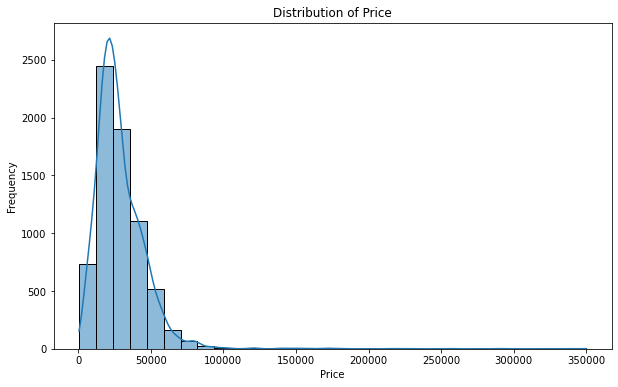

In [9]:
# Task 2 Question 6

#Preparing and loading the dataset for visualisations
df_filtered = df_encoded[df_encoded.index <= 6999]

# Visualize the distribution of the 'price'
plt.figure(figsize=(10, 6))
sns.histplot(df_filtered['price'].dropna(), kde=True, bins=30)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()




#### In this histogram we can see the distribution of our target variable ‘price’:
- The distribution is right-skewed, indicating that most cars are priced lower, with a long tail extending towards higher prices.
- The majority of car prices are concentrated between USD 0  and USD 50,000, with relatively fewer cars priced above USD 100,000.


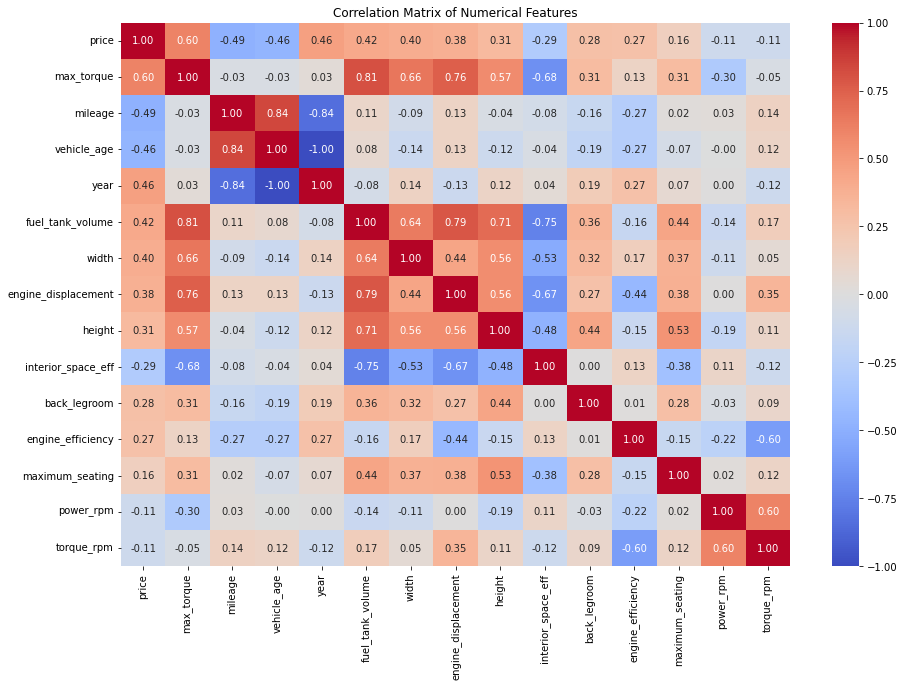

In [10]:
# Compute and visualize the correlation matrix for numerical features
numerical_features_filtered = df_filtered.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df_filtered[numerical_features_filtered].corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numerical Features')
plt.show()


#### In the correlation matrix of numerical features we can observe that:
- price has a strong positive correlation with max_torque (0.60) and year (0.46), indicating that higher torque and newer cars are associated with higher prices.
- mileage has a strong negative correlation with price (-0.49), suggesting that cars with higher mileage tend to have lower prices.
- Other notable correlations include fuel_tank_volume with max_torque (0.81) and engine_displacement with max_torque (0.76).

This heatmap helps identify which features might be redundant and can potentially be dropped or combined.


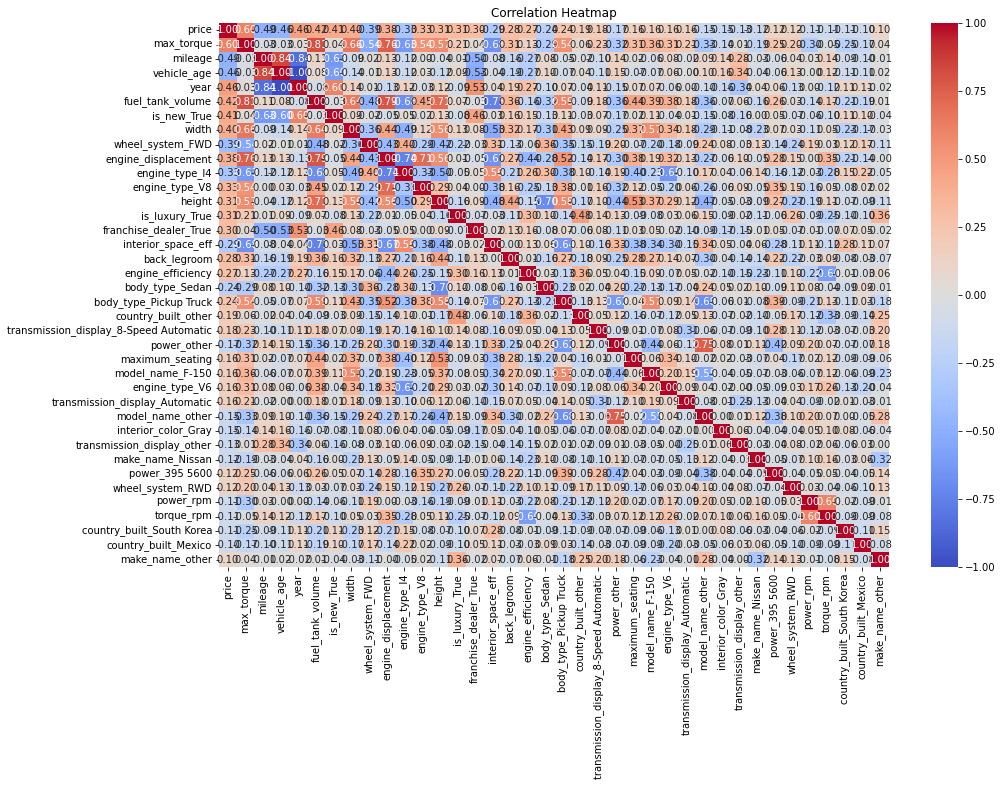

In [11]:
# Correlation heatmap
plt.figure(figsize=(15, 10))
correlation_matrix = df_filtered.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


#### In this correlation general heatmap it can be seen that it extends the previous one to include both numerical and categorical features: 
- is_luxury_True has a positive correlation with price, indicating that luxury cars tend to be more expensive.
- year is strongly negatively correlated with vehicle_age, as expected.

This heat map also highlights relationships among categorical features, such as body_type, fuel_type, and transmission, with price and other numerical features. Such detailed correlation analysis can guide feature selection and engineering.



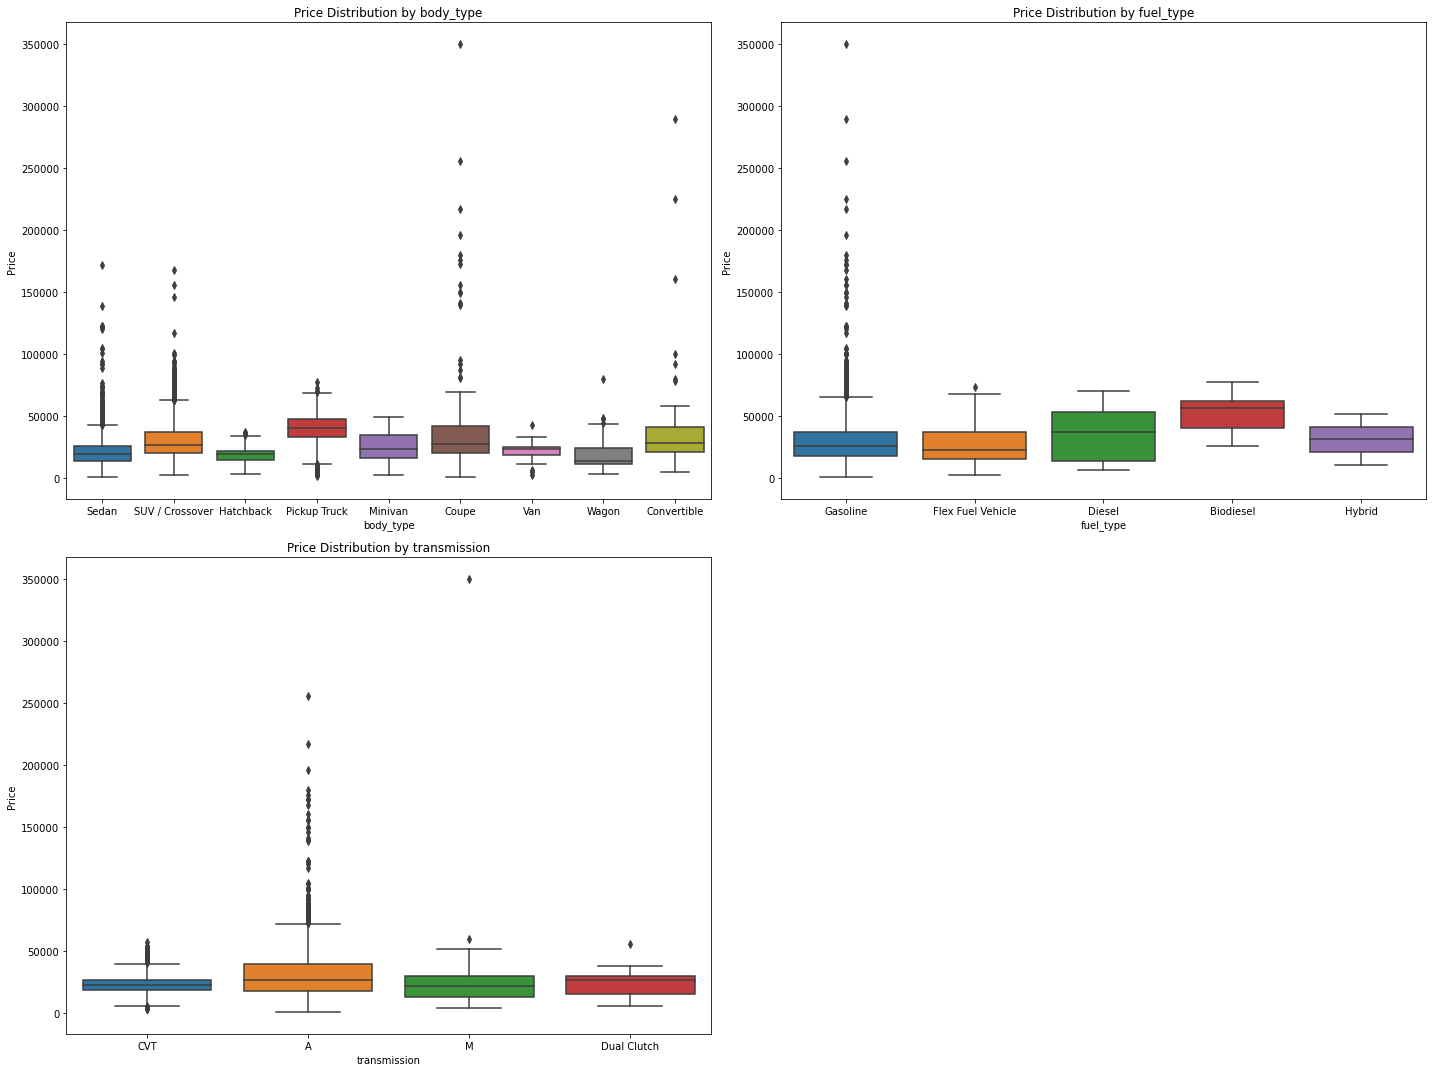

In [12]:
# Analyze the relationship between some original categorical features and 'price' using box plots
# Choosing a few original categorical features for visualization
original_categorical_features = ['body_type','fuel_type', 'transmission']

plt.figure(figsize=(20, 15))
for i, column in enumerate(original_categorical_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=column, y='price', data=df.iloc[:7001])
    plt.title(f'Price Distribution by {column}')
    plt.xlabel(column)
    plt.ylabel('Price')

plt.tight_layout()
plt.show()

#### Price Distribution by Body Type:
- These box plots illustrate the distribution of car prices for different body types. Each box plot represents the interquartile range (IQR) and the median price for each body type.
- Pickup trucks and coupes generally have higher median prices compared to sedans and hatchbacks.
- The distribution also shows significant price variation within body types, with some outliers indicating very high-priced cars.

Understanding these distributions helps in segmenting the market and tailoring pricing strategies.


#### Price Distribution by Fuel Type (These box plots show the distribution of car prices across different fuel types):
- Diesel and hybrid cars tend to have higher median prices compared to gasoline and flex-fuel vehicles.
- The presence of outliers in  Gasoline and Flex fuel vehicles categories indicates that some models are significantly more expensive.

This information can be valuable for understanding consumer preferences and pricing based on fuel type.


#### Price Distribution by Transmission Type(These box plots display the price distribution for different transmission types):
- Automatic transmissions (A) have a wider price range and higher median prices compared to manual (M) and CVT transmissions.
- Dual clutch transmissions also have a narrower price range but with higher median prices than some other types.

This could reflect consumer demand and manufacturer pricing strategies for different transmission technologies.


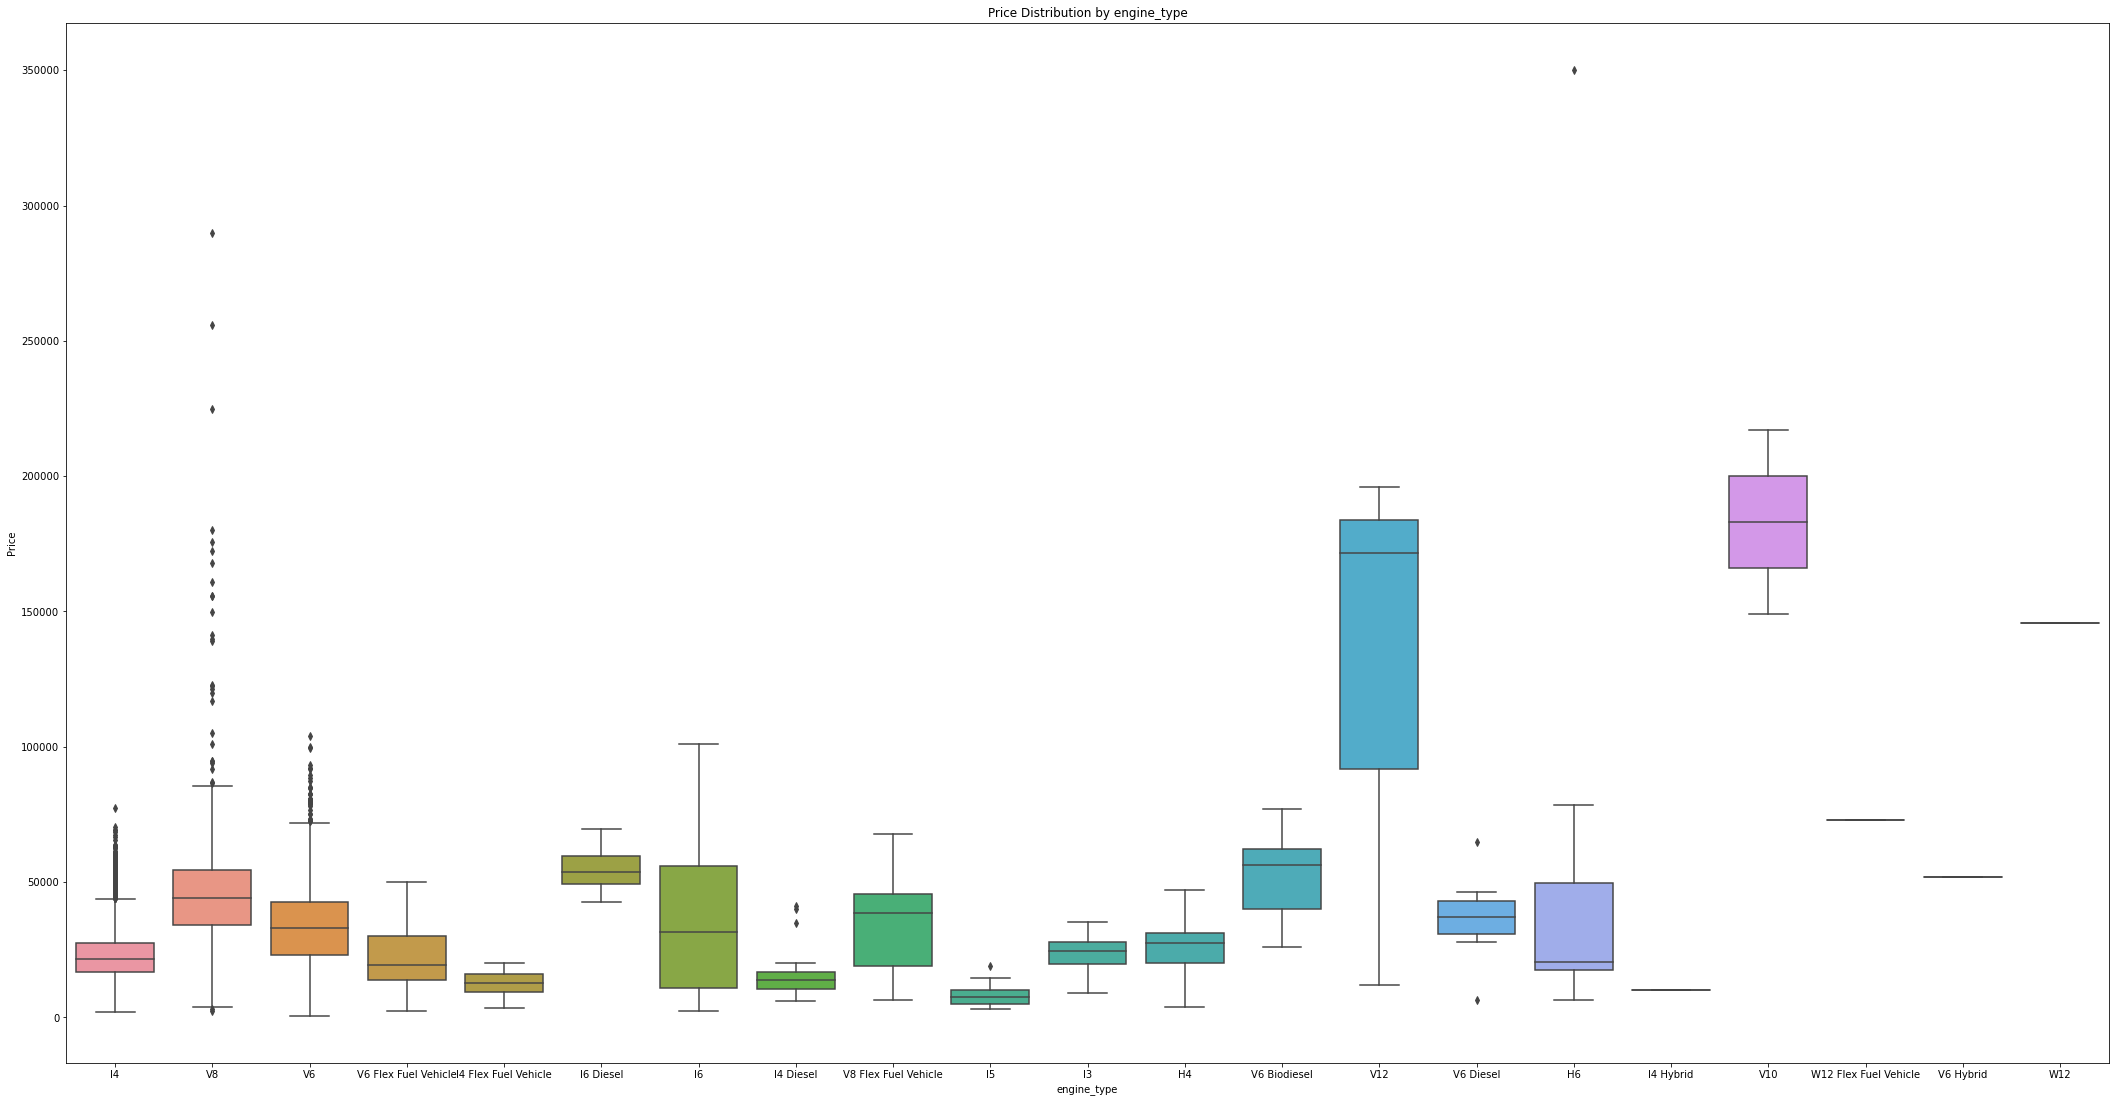

In [13]:
# Analyze the relationship between some original categorical features and 'price' using box plots
# Choosing a few original categorical features for visualization
original_categorical_features = ['engine_type']

plt.figure(figsize=(58, 30))
for i, column in enumerate(original_categorical_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=column, y='price', data=df.iloc[:7001])
    plt.title(f'Price Distribution by {column}')
    plt.xlabel(column)
    plt.ylabel('Price')

plt.tight_layout()
plt.show()

#### Price Distribution by Engine Type (These box plots illustrate the price distribution for various engine types):
- Cars with V12 and V10 engines have significantly higher prices, reflecting their premium status and performance capabilities.
- Engine types like I4 and V6 have broader distributions, indicating a wider range of car prices within these categories.

This analysis can help in understanding the impact of engine specifications on car pricing.

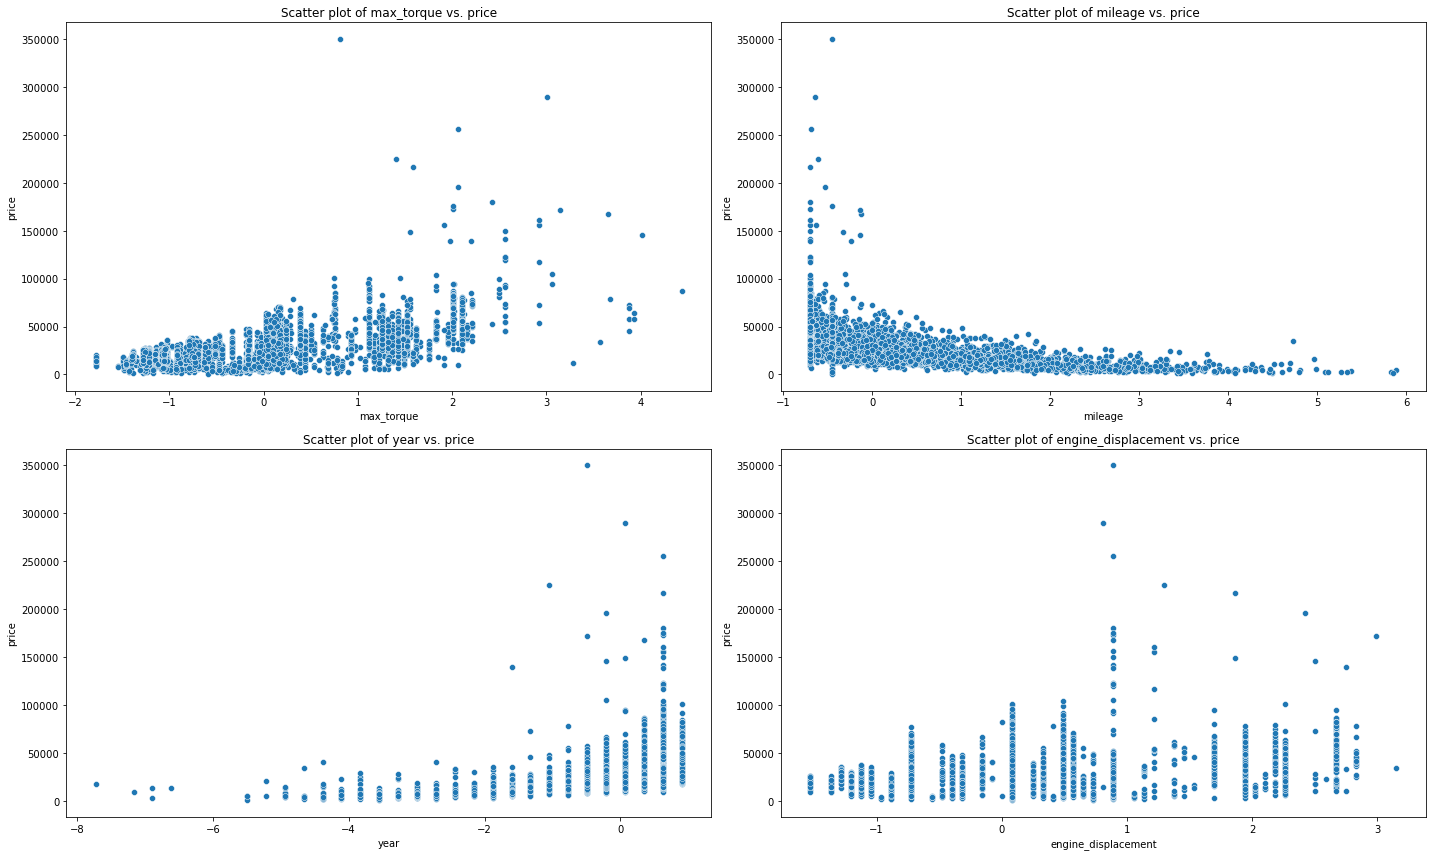

In [14]:
# Task 2 Question 6 continued...
# Further visualisations

# Set up the matplotlib figure
plt.figure(figsize=(20, 12))

# Scatter plots for selected numerical features vs. price
numerical_features_to_plot = ['max_torque', 'mileage', 'year', 'engine_displacement']

for i, feature in enumerate(numerical_features_to_plot, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(data=df_filtered, x=feature, y='price')
    plt.title(f'Scatter plot of {feature} vs. price')

plt.tight_layout()
plt.show()

#### Scatter Plots of Key Features vs. Price:
These scatter plots show the relationship between key features (max_torque, mileage, year, and engine_displacement) and car prices.

- max_torque vs. price: There's a positive trend, indicating higher torque cars are generally more expensive.
- mileage vs. price: A negative trend shows that cars with higher mileage are less expensive.
- year vs. price: Newer cars (higher year values) tend to be more expensive.
- engine_displacement vs. price: There's a positive trend, suggesting that cars with larger engines are priced higher.

These visualizations help in understanding the direct impact of these features on car pricing.

`(Task 2, Question 6 Text Here - insert more cells as required)`

--- 
## Task 3: Fit and tune a forecasting model, submit predictions & win competition

Make sure you **clearly explain each step** you do both in Markdown and on the recoded video.   
*In this task you must not create any additional features and should only relly on the datasets constructed in Task 2.*

1. Build and explain at least 3 machine learning (ML) regression models taking into account the outcomes of Tasks 1 & 2 (3 marks)    
2. Fit the models and tune hyperparameters via cross-validation: make sure you comment and explain each step clearly (3 marks)   
3. Select your best algorithm, create predictions using the test dataset, and submit your predictions on Kaggle's competition page. Make sure you explain all the steps that led you to chose this algorithm both in the video presentation and in your written answer. (4 marks)   
4. Provide Kaggle ranking and score (screenshot your final submission) and comment (e.g. how could you improve your ranking?) (2 mark)   

- Hints:
    - To perform well you will need to iterate Tasks 2 and Task 3
    - Make sure your Python code works, so that a marker that can replicate your Kaggle submission and score.
    - You will receive the mark of zero if your code does not produce the forecasts uploaded to Kaggle 

**Total Marks: 12**

Student in charge of this task: Aditya Agarwal and Han Chang Li

### Task 3 Question 1

In [15]:
# Prepare the data
df_filtered = df_encoded[df_encoded.index <7000]

# Split the data into training and testing sets (70% training, 30% testing)
X = df_filtered.drop(columns=['price'])
y = df_filtered['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
#Task 3 Question 1

# Initialize the Linear Regression model
linear_model = LinearRegression()

# Fit the model to the training data
linear_model.fit(X_train, y_train)

# Predict on the test data
y_pred_linear = linear_model.predict(X_test)

# Calculate MAPE for Linear Regression
mape_linear = mean_absolute_percentage_error(y_test, y_pred_linear)
print(f"MAPE for Linear Regression: {mape_linear:.2f}")


MAPE for Linear Regression: 0.26


In [17]:
#Task 3 Question 1

# Initialize the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Predict on the test data
y_pred_rf = rf_model.predict(X_test)

# Calculate MAPE for Random Forest Regressor
mape_rf = mean_absolute_percentage_error(y_test, y_pred_rf)
print(f"MAPE for Random Forest Regressor: {mape_rf:.2f}")


MAPE for Random Forest Regressor: 0.13


In [18]:
#Task 3 Question 1

# Initialize the Decision Tree Regressor model
dt_model = DecisionTreeRegressor(random_state=42)

# Fit the model to the training data
dt_model.fit(X_train, y_train)

# Predict on the test data
y_pred_dt = dt_model.predict(X_test)

# Calculate MAPE for Decision Tree Regressor
mape_dt = mean_absolute_percentage_error(y_test, y_pred_dt)
print(f"MAPE for Decision Tree Regressor: {mape_dt:.2f}")


MAPE for Decision Tree Regressor: 0.16


In [19]:
#Task 3 Question 1

# Initialize the Gradient Boosting Regressor model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
gb_model.fit(X_train, y_train)

# Predict on the test data
y_pred_gb = gb_model.predict(X_test)

# Calculate MAPE for Gradient Boosting Regressor
mape_gb = mean_absolute_percentage_error(y_test, y_pred_gb)
print(f"MAPE for Gradient Boosting Regressor: {mape_gb:.2f}")


MAPE for Gradient Boosting Regressor: 0.15


In [20]:
#Task 3 Question 1

# Initialize the Support Vector Regressor model
svr_model = SVR(kernel='linear')

# Fit the model to the training data
svr_model.fit(X_train, y_train)

# Predict on the test data
y_pred_svr = svr_model.predict(X_test)

# Calculate MAPE for Support Vector Regressor
mape_svr = mean_absolute_percentage_error(y_test, y_pred_svr)
print(f"MAPE for Support Vector Regressor: {mape_svr:.2f}")


MAPE for Support Vector Regressor: 0.25


### Task 3 Question 2

In [21]:
#Task 3 Question 2

# Define the models and hyperparameter grids
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Support Vector Regressor': SVR()
}

param_grids = {
    'Linear Regression': {},
    
    'Random Forest': {
        'n_estimators': [100, 200],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5, 10]
    },
    'Decision Tree': {
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5, 10]
    },
    'Gradient Boosting': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    },
    'Support Vector Regressor': {
        'kernel': ['linear', 'rbf'],
        'C': [0.1, 1, 10],
        'epsilon': [0.01, 0.1, 1]
    }
}

# Define the scoring function
scorer = make_scorer(mean_absolute_percentage_error, greater_is_better=False)


In [22]:
#Task 3 Question 2
# Initialize dictionaries to store the best models and their scores
best_models = {}
best_scores = {}

# Perform Grid Search with Cross-Validation
for model_name, model in models.items():
    print(f"Training dataset {model_name}...")
    grid_search = GridSearchCV(model, param_grids[model_name], scoring=scorer, cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_models[model_name] = grid_search.best_estimator_
    best_scores[model_name] = -grid_search.best_score_
    print(f"Best MAPE for {model_name}: {best_scores[model_name]:.5f}")
    print(f"Best Parameters for {model_name}: {grid_search.best_params_}\n")


Training dataset Linear Regression...
Best MAPE for Linear Regression: 0.26901
Best Parameters for Linear Regression: {}

Training dataset Random Forest...
Best MAPE for Random Forest: 0.12686
Best Parameters for Random Forest: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}

Training dataset Decision Tree...
Best MAPE for Decision Tree: 0.15819
Best Parameters for Decision Tree: {'max_depth': 10, 'min_samples_split': 2}

Training dataset Gradient Boosting...
Best MAPE for Gradient Boosting: 0.12059
Best Parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}

Training dataset Support Vector Regressor...
Best MAPE for Support Vector Regressor: 0.21758
Best Parameters for Support Vector Regressor: {'C': 10, 'epsilon': 0.01, 'kernel': 'linear'}



In [23]:
#Task 3 Question 2
# Evaluate the best models on the test set
test_scores = {}

for model_name, model in best_models.items():
    y_pred = model.predict(X_test)
    test_mape = mean_absolute_percentage_error(y_test, y_pred)
    test_scores[model_name] = test_mape
    print(f"Test dataset MAPE for {model_name}: {test_mape:.5f}")


Test dataset MAPE for Linear Regression: 0.26393
Test dataset MAPE for Random Forest: 0.12888
Test dataset MAPE for Decision Tree: 0.15562
Test dataset MAPE for Gradient Boosting: 0.11932
Test dataset MAPE for Support Vector Regressor: 0.21937


### Task 3 Question 3

In [24]:
#Task 3 Question 3

# the best model is Gradient Boosting Regressor (gb_model) from the previous steps
best_model = best_models['Gradient Boosting']

# Load and filter the test dataset (rows after 7000)
df_test = df_encoded[df_encoded.index >= 7000]

# Ensure 'vin' column is properly handled
vin_test = df.loc[df.index >= 7000, 'vin']

# Apply the same preprocessing steps as the training data
X_test = df_test.drop(columns=['price'])

# Make predictions
predictions = best_model.predict(X_test)

# Prepare the output DataFrame
output = pd.DataFrame({'vin': vin_test, 'price': predictions})

# Save to CSV
output.to_csv('data/final_predictions.csv', index=False)


### Task 3 Question 4

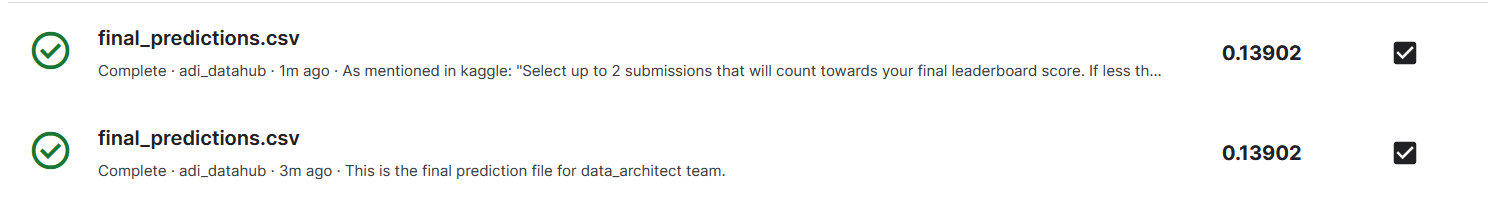

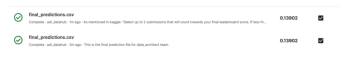

In [10]:
# Please dont run this code

#importing libraries required here for image display
from IPython.display import Image, display
import matplotlib.image as mpimg

# Using IPython Display
display(Image(filename='finalpre.png'))

# Using Matplotlib
img = mpimg.imread('finalpre.png')
plt.imshow(img)
plt.axis('off')
plt.show()

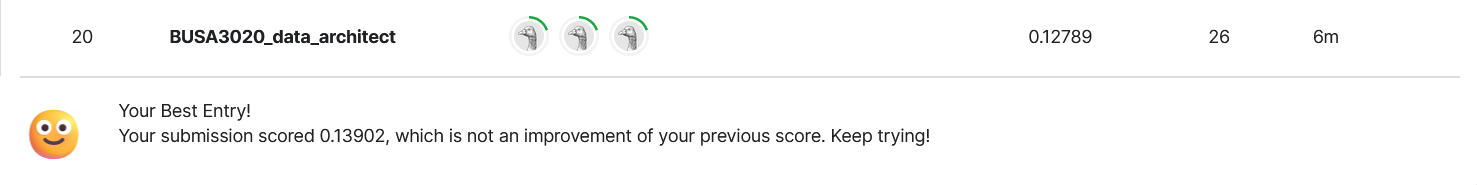

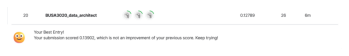

In [11]:
# Please dont run this code

# Using IPython Display
display(Image(filename='finale.png'))

# Using Matplotlib
img = mpimg.imread('finale.png')
plt.imshow(img)
plt.axis('off')
plt.show()


## Comments->

#### Data Preparation and Imputation:

- Numerical features were imputed using the median, and categorical features were imputed using the mode (using Simple Imputer).
- The 'price' column was correctly excluded from the imputation process after row 7000.

#### Feature Engineering:

- New features were created, such as power_to_weight_ratio, combined_fuel_efficiency, vehicle_age, and others.
- Categorical variables were encoded, and some features were mapped to reduce the number of unique values.

#### Model Selection and Hyperparameter Tuning:

- Multiple models were built, including Linear Regression, Random Forest, Decision Tree, Gradient Boosting, and Support Vector Regressor.
- Hyperparameters were tuned using GridSearchCV.


## How can we improve? ->

- Feature Engineering Enhancements : May consider adding polynomial features to capture non-linear relationships.
- Advanced Imputation Techniques: May use KNN imputer for potentially better imputation if the relationships between features are complex.
- Ensemble Methods: May use ensemble methods to combine predictions from multiple models. For example, stacking, bagging, or boosting.
- Hyperparameter Optimization: May use advanced hyperparameter optimization techniques like RandomizedSearchCV or Bayesian Optimization for better hyperparameter tuning.
-  Cross-Validation and Robust Evaluation: May use K-Fold Cross-Validation to ensure robust evaluation using k-fold cross-validation to mitigate overfitting and assess model performance more reliably.
- Data Transformation: May apply log transformation to the target variable to reduce skewness in the distribution.

---
---
## Marking Criteria

To receive full marks your solutions must satisfy the following criteria:

- Problem Description: 12 marks
- Data Cleaning: 12 marks
- Building Forecasting models: 12 marks
- Competition Points: 4 marks
- Forecasts correctly uploaded to Kaggle
- Python code is clean and concise
- Written explanations are provided in clear and easy to understand sentences
- Video presentations are limited to 15 minutes in duration
- Each team member delivers a 5-minute presentation on their assigned task
    - During the video recording, make sure that both your face and Jupyter Notebook are clearly visible
    - Your code must be readable on the video
    - Discuss both the actions you took and, more importantly, the reasoning behind these actions, explaining the significance of key steps
- The assignment notebook is well-organised and easy to follow
- Failure to meet the above marking criteria will result in a deduction of marks

---
---